<a href="https://colab.research.google.com/github/MeghaUkkali9/Advanced-Machine-Learing/blob/master/Project1_MeghaUkkali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1
3) Download the Wine data set from https://archive.ics.uci.edu/ml/datasets/Wine (Links to an external site.) and create a new Jupytor notebook to perform the following tasks:
a) --Plot the classification data against each of the attributes

b) -- Which attribute has the highest correlation with the classification  label?

c) -- Repeat all the experiments in 02_end_to_end_machine_learning_project.ipynb but use the Wine data set instead the housing data

Upload the wine dataset from the git hub

In [0]:
import os
import urllib


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/MeghaUkkali9/Advanced-Machine-Learing/master/"
WINEDATA_PATH = os.path.join("datasets", "WineCheminalAnaysis")
WINEDATA_URL = DOWNLOAD_ROOT + "datasets/WineCheminalAnaysis/winedata.csv"

def fetch_winedata_data(winedata_url=WINEDATA_URL, winedata_path=WINEDATA_PATH):
    if not os.path.isdir(winedata_path):
        os.makedirs(winedata_path)
    tgz_path = os.path.join(winedata_path, "winedata.csv")
    urllib.request.urlretrieve(winedata_url, tgz_path)

In [0]:
fetch_winedata_data()

Load the .csv file of wine dataset

In [0]:
import pandas as pd

def load_winedata_data(winedata_path=WINEDATA_PATH):
    csv_path = os.path.join(winedata_path, "winedata.csv")
    return pd.read_csv(csv_path)

In [133]:
winedata1 = load_winedata_data()
winedata1.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [134]:
winedata1.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [135]:
csv_path = os.path.join(WINEDATA_PATH, "winedata.csv")
wine_cols = ['wine class','Alcohol', 'Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
winedata = pd.read_table(csv_path, sep=',', header=None, names=wine_cols)
winedata.head()

,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [136]:
winedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
wine class                      178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [137]:
winedata["wine class"].value_counts()

2    71
1    59
3    48
Name: wine class, dtype: int64

In [138]:
winedata.describe()

,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


PLOT THE CLASSIFICATION DATA FOR EACH ATTRIBUTE

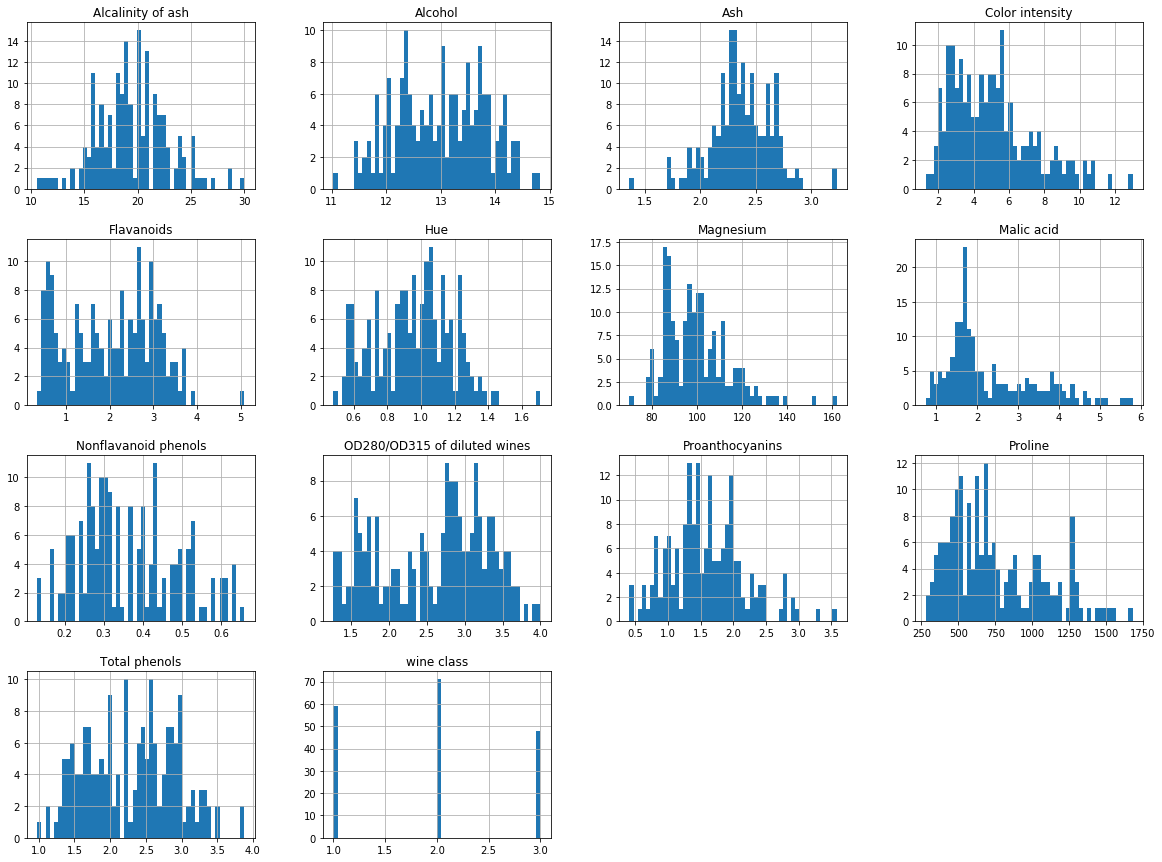

In [140]:
%matplotlib inline
import matplotlib.pyplot as plt
winedata.hist(bins=50, figsize=(20,15))
plt.show()

2) Which attribute has the highest correlation with the classification  label?


Flavanoids has the highest correlation with the Total Phenols.

In [142]:
corr_matrix = winedata.corr()
corr_matrix["Flavanoids"].sort_values(ascending=False)

Flavanoids                      1.000000
Total phenols                   0.864564
OD280/OD315 of diluted wines    0.787194
Proanthocyanins                 0.652692
Hue                             0.543479
Proline                         0.494193
Alcohol                         0.236815
Magnesium                       0.195784
Ash                             0.115077
Color intensity                -0.172379
Alcalinity of ash              -0.351370
Malic acid                     -0.411007
Nonflavanoid phenols           -0.537900
wine class                     -0.847498
Name: Flavanoids, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f63809e6f28>,
      dtype=object)

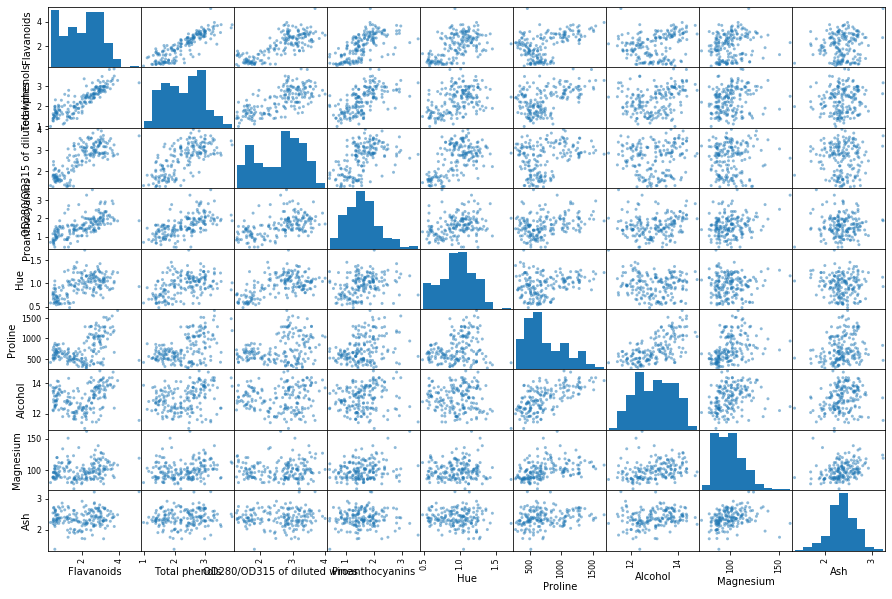

In [143]:
from pandas.plotting import scatter_matrix

attributes = [ "Flavanoids", 
              "Total phenols", "OD280/OD315 of diluted wines","Proanthocyanins","Hue","Proline","Alcohol","Magnesium","Ash" ]
scatter_matrix(winedata[attributes], figsize=(15, 10))

wine class
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

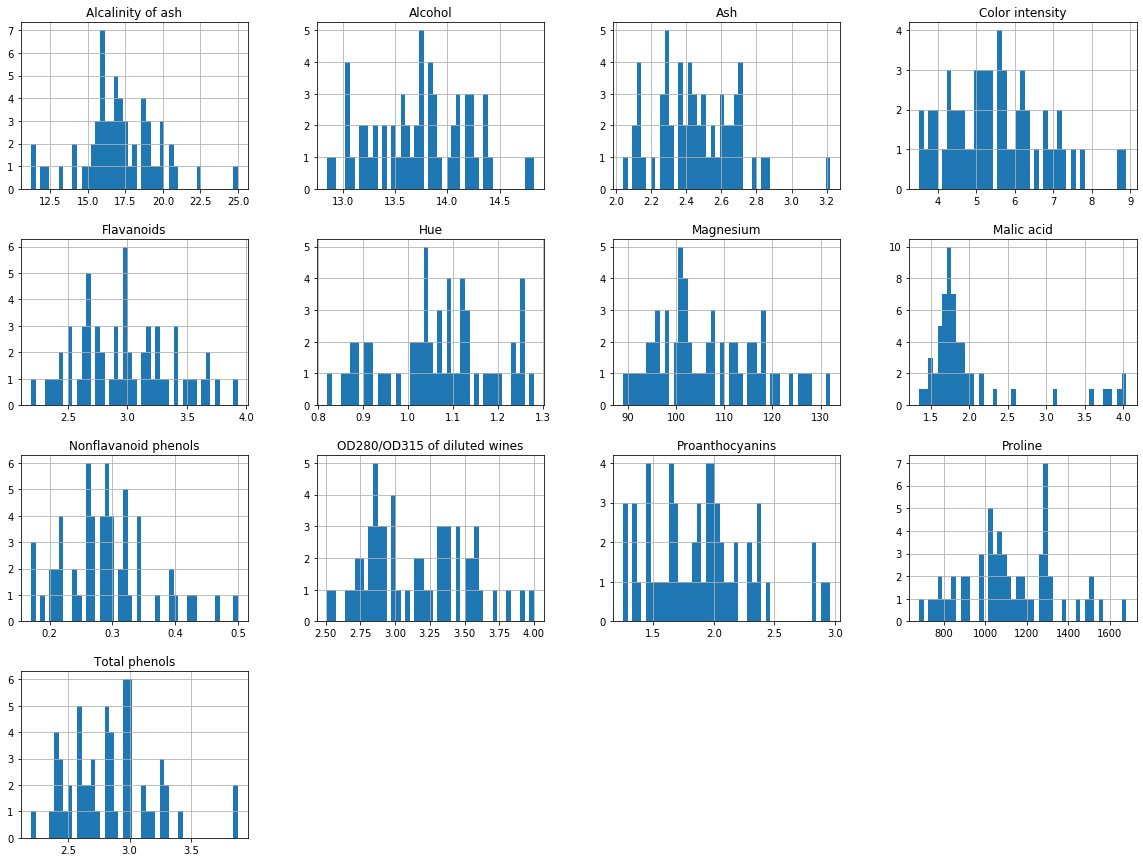

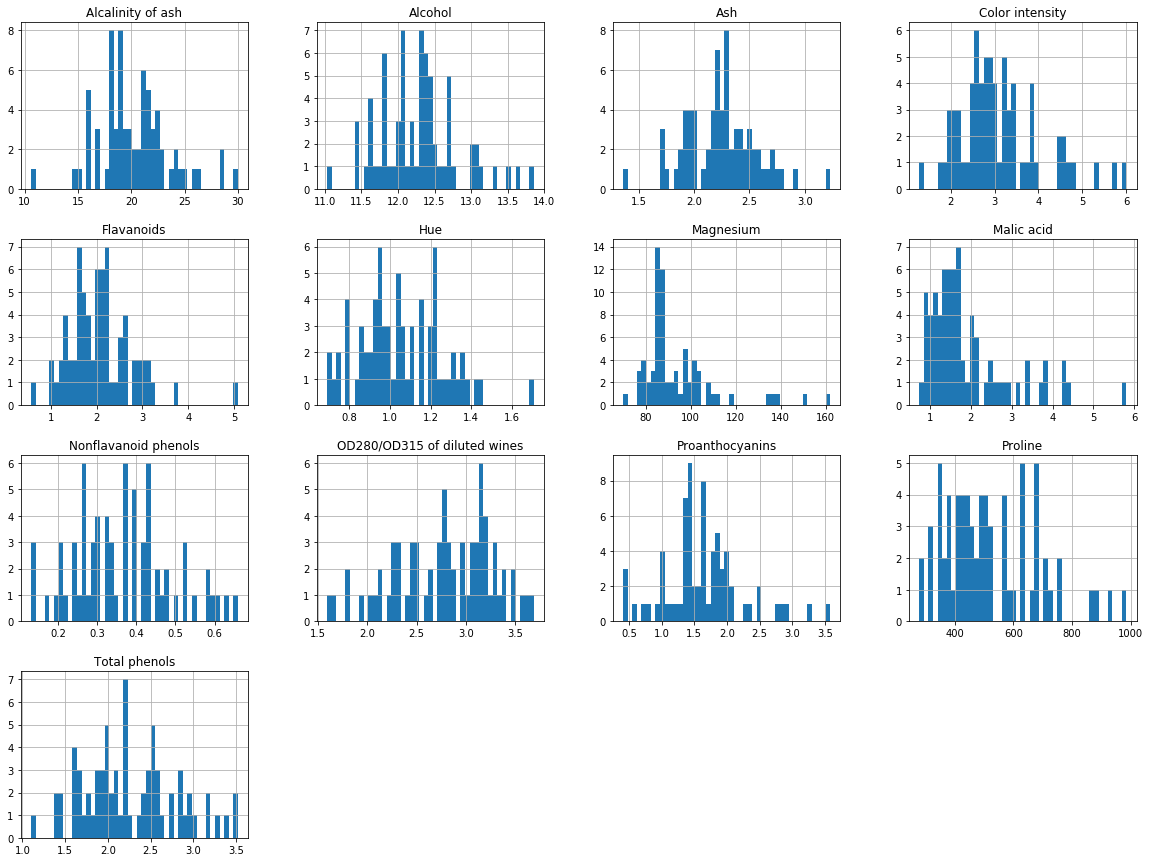

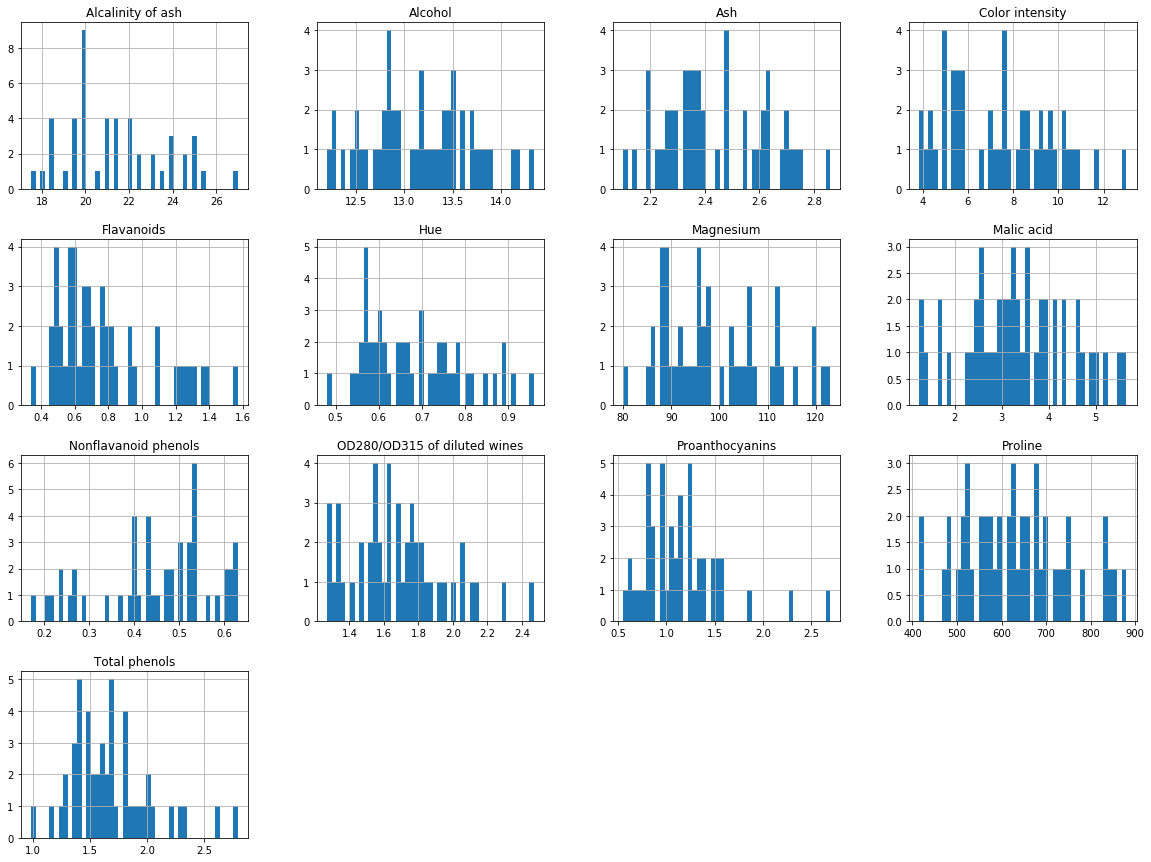

In [144]:
	
winedata.groupby('wine class').hist(bins=45, figsize=(20,15))

wine class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Flavanoids, dtype: object

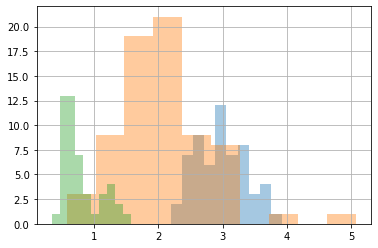

In [51]:

winedata.groupby('wine class').Flavanoids.hist(alpha=0.4)


3) Repeat all the experiments in 02_end_to_end_machine_learning_project.ipynb but use the Wine data set instead the housing data
Follwing 2example from here

In [0]:
# to make this notebook's output identical at every run
import numpy as np

np.random.seed(42)

In [0]:


# For illustration only. Sklearn has train_test_split()
def split_train_test(winedata, test_ratio):
    shuffled_indices = np.random.permutation(len(winedata))
    test_set_size = int(len(winedata) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return winedata.iloc[train_indices], winedata.iloc[test_indices]

In [147]:
train_set, test_set = split_train_test(winedata, 0.2)
len(train_set)

143

In [148]:
len(test_set)

35

In [0]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_id(winedata, test_ratio, id_column):
    ids = winedata[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return winedata.loc[~in_test_set], winedata.loc[in_test_set]

In [0]:
import hashlib

def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

In [0]:
def test_set_check(identifier, test_ratio, hash=hashlib.md5):
    return bytearray(hash(np.int64(identifier)).digest())[-1] < 256 * test_ratio

In [0]:
housing_with_id = winedata.reset_index()   # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [153]:
test_set.head()

,index,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
4,4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
11,11,1,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280
20,20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780
23,23,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015


In [0]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(winedata, test_size=0.2, random_state=42)

In [155]:
test_set.head()

,wine class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


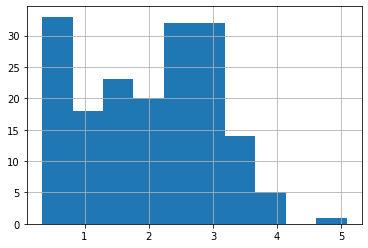

In [156]:
winedata["Flavanoids"].hist()

In [0]:
winedata["income_cat"] = pd.cut(winedata["Flavanoids"],
                               bins=[0., 1, 2.0, 3.0, np.inf],
                               labels=[1, 2, 3, 4])

In [158]:
winedata["income_cat"].value_counts()

3    66
2    41
1    40
4    31
Name: income_cat, dtype: int64

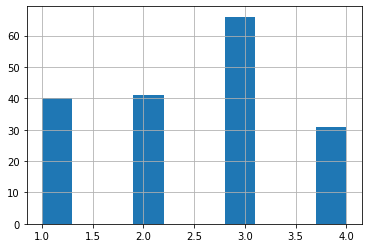

In [160]:
winedata["income_cat"].hist()

In [0]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(winedata, winedata["income_cat"]):
    strat_train_set = winedata.loc[train_index]
    strat_test_set = winedata.loc[test_index]

In [162]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.388889
2    0.222222
1    0.222222
4    0.166667
Name: income_cat, dtype: float64

In [163]:
winedata["income_cat"].value_counts() / len(winedata)

3    0.370787
2    0.230337
1    0.224719
4    0.174157
Name: income_cat, dtype: float64

In [0]:
def income_cat_proportions(winedata):
    return winedata["income_cat"].value_counts() / len(winedata)

train_set, test_set = train_test_split(winedata, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(winedata),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [164]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.224719,0.222222,0.194444,-13.472222,-1.111111
2,0.230337,0.222222,0.194444,-15.582656,-3.523035
3,0.370787,0.388889,0.388889,4.882155,4.882155
4,0.174157,0.166667,0.222222,27.598566,-4.301075


In [0]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

**Discover and visualize the data to gain insights**

In [0]:
winedata = strat_train_set.copy()

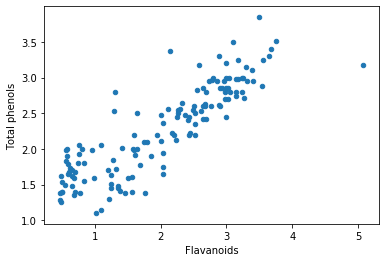

In [167]:
winedata.plot(kind="scatter", x="Flavanoids", y="Total phenols")


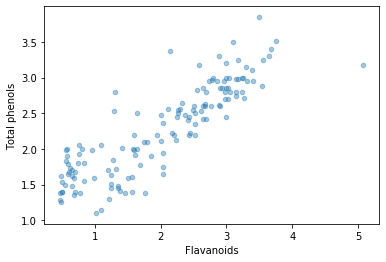

In [168]:
winedata.plot(kind="scatter", x="Flavanoids", y="Total phenols", alpha=0.4)

In [0]:
corr_matrix = winedata.corr()

In [170]:
corr_matrix["Flavanoids"].sort_values(ascending=False)

Flavanoids                      1.000000
Total phenols                   0.868825
OD280/OD315 of diluted wines    0.792715
Proanthocyanins                 0.654610
Hue                             0.543242
Proline                         0.464833
Alcohol                         0.247942
Magnesium                       0.196089
Ash                             0.165522
Color intensity                -0.160575
Alcalinity of ash              -0.277629
Malic acid                     -0.432426
Nonflavanoid phenols           -0.531723
wine class                     -0.833745
Name: Flavanoids, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f637c5e3240>,
      dtype=object)

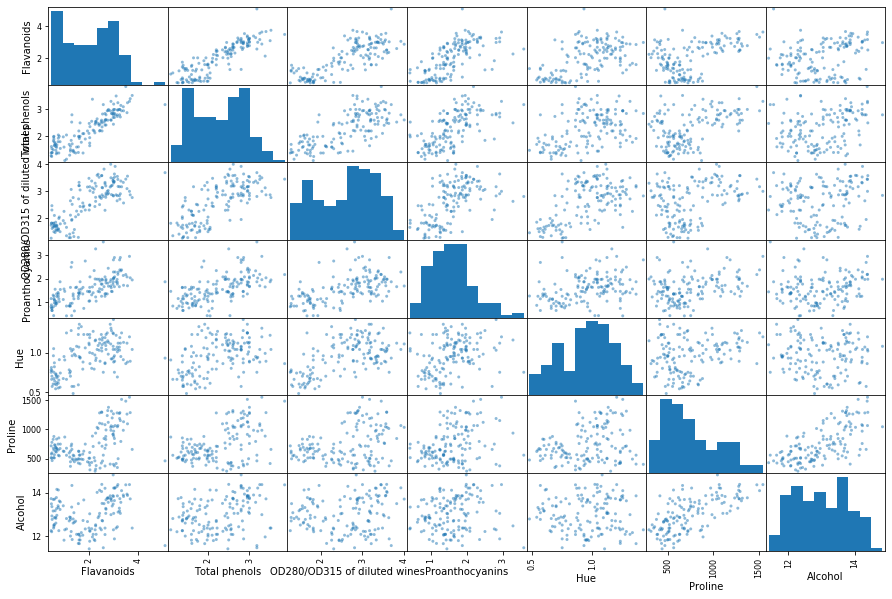

In [171]:
from pandas.plotting import scatter_matrix

attributes = [ "Flavanoids", 
              "Total phenols", "OD280/OD315 of diluted wines","Proanthocyanins","Hue","Proline","Alcohol" ]
scatter_matrix(winedata[attributes], figsize=(15, 10))

[0, 4, 0, 5]

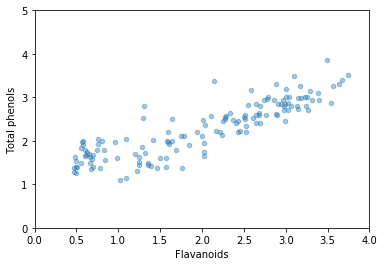

In [172]:
winedata.plot(kind="scatter", x="Flavanoids",  y="Total phenols",
             alpha=0.4)
plt.axis([0, 4, 0, 5])


**Prepare the data for Machine Learning algorithms**

In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

winedata_tr = num_pipeline.fit_transform(winedata)

In [175]:
winedata_tr

array([[ 0.08219607, -0.89731569, -0.81914347, ...,  1.24351186,
         0.177971  , -1.08540137],
       [ 1.37906732,  0.5044177 ,  1.46878676, ..., -1.18139104,
        -1.47141066, -0.00878267],
       [ 0.08219607, -1.06148266, -0.63610905, ...,  1.70104071,
        -0.49296391, -0.86138443],
       ...,
       [-1.21467519,  1.52730423,  1.58775913, ..., -0.403592  ,
         1.00266183,  1.09458432],
       [ 1.37906732, -0.16487842,  2.10940723, ..., -1.91343721,
        -1.05207634, -0.42672471],
       [-1.21467519, -0.08910905,  1.36811783, ...,  0.32845416,
         1.26824023,  0.05808806]])

In [0]:
from sklearn.compose import ColumnTransformer

num_attribs = list(winedata)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])

winedata_prepared = full_pipeline.fit_transform(winedata)

In [87]:
winedata_prepared

array([[ 0.08219607, -0.89731569, -0.81914347, ...,  1.24351186,
         0.177971  , -1.08540137],
       [ 1.37906732,  0.5044177 ,  1.46878676, ..., -1.18139104,
        -1.47141066, -0.00878267],
       [ 0.08219607, -1.06148266, -0.63610905, ...,  1.70104071,
        -0.49296391, -0.86138443],
       ...,
       [-1.21467519,  1.52730423,  1.58775913, ..., -0.403592  ,
         1.00266183,  1.09458432],
       [ 1.37906732, -0.16487842,  2.10940723, ..., -1.91343721,
        -1.05207634, -0.42672471],
       [-1.21467519, -0.08910905,  1.36811783, ...,  0.32845416,
         1.26824023,  0.05808806]])

In [88]:
winedata_prepared.shape

(142, 14)

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class OldDataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [0]:
num_attribs = list(winedata)

old_num_pipeline = Pipeline([
        ('selector', OldDataFrameSelector(num_attribs)),
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [0]:
from sklearn.pipeline import FeatureUnion

old_full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", old_num_pipeline)
    ])

In [92]:
old_housing_prepared = old_full_pipeline.fit_transform(winedata)
old_housing_prepared

array([[ 0.08219607, -0.89731569, -0.81914347, ...,  1.24351186,
         0.177971  , -1.08540137],
       [ 1.37906732,  0.5044177 ,  1.46878676, ..., -1.18139104,
        -1.47141066, -0.00878267],
       [ 0.08219607, -1.06148266, -0.63610905, ...,  1.70104071,
        -0.49296391, -0.86138443],
       ...,
       [-1.21467519,  1.52730423,  1.58775913, ..., -0.403592  ,
         1.00266183,  1.09458432],
       [ 1.37906732, -0.16487842,  2.10940723, ..., -1.91343721,
        -1.05207634, -0.42672471],
       [-1.21467519, -0.08910905,  1.36811783, ...,  0.32845416,
         1.26824023,  0.05808806]])

In [93]:
np.allclose(winedata_prepared, old_housing_prepared)

True

**Select and train a model**

In [0]:
housing = strat_train_set.drop("Flavanoids", axis=1) # drop labels for training set
housing_labels = strat_train_set["Flavanoids"].copy()

In [95]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(winedata_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
some_data = winedata.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", lin_reg.predict(some_data_prepared))

Predictions: [2.5  0.75 1.69 0.55 5.08]


In [97]:
print("Labels:", list(some_labels))

Labels: [2.5, 0.75, 1.69, 0.55, 5.08]


In [98]:
some_data_prepared

array([[ 0.08219607, -0.89731569, -0.81914347, -1.35145288, -1.0484339 ,
        -1.02005748,  0.43052704,  0.48249593, -0.53570808,  0.3030777 ,
        -0.95039067,  1.24351186,  0.177971  , -1.08540137],
       [ 1.37906732,  0.5044177 ,  1.46878676,  0.3843133 ,  1.0805616 ,
         0.12100775, -0.76165002, -1.27068784,  0.58533156, -0.30641608,
         1.00458429, -1.18139104, -1.47141066, -0.00878267],
       [ 0.08219607, -1.06148266, -0.63610905, -0.2058472 ,  1.01973316,
        -0.68445006, -0.79344141, -0.3289777 ,  0.58533156, -0.05246034,
        -1.15033129,  1.70104071, -0.49296391, -0.86138443],
       [ 1.37906732,  0.20134021,  1.15762825, -0.76129238,  0.47227717,
         0.12100775, -1.23852084, -1.4710517 ,  0.58533156, -0.49265029,
        -0.46164693, -1.6389199 , -1.30367693,  0.25870024],
       [ 0.08219607, -1.81917639, -0.23343333,  2.98796256,  2.75334377,
         1.26207297,  1.43195577,  3.0671897 ,  0.9056286 ,  0.47238152,
         0.42697805, -0.12

In [99]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(winedata_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

8.025965219944837e-16

In [100]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(housing_labels, housing_predictions)
lin_mae

6.528424123676096e-16

In [101]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(winedata_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [102]:
housing_predictions = tree_reg.predict(winedata_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Fine-tune your model**

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, winedata_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [104]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [0.34903677 0.08274459 0.04157609 0.03741657 0.04605897 0.06296257
 0.04342481 0.05070926 0.54960375 0.05867587]
Mean: 0.13222092505522864
Standard deviation: 0.16523564220146356


In [105]:
lin_scores = cross_val_score(lin_reg, winedata_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [6.81981849e-16 5.27014969e-16 7.33443758e-16 1.01233139e-15
 8.88673917e-16 5.50332845e-16 6.88235943e-16 1.57065311e-15
 7.62286414e-16 6.42588033e-16]
Mean: 8.057542220497919e-16
Standard deviation: 2.899012520785639e-16


Note: we specify n_estimators=100 to be future-proof since the default value is going to change to 100 in Scikit-Learn 0.22 (for simplicity, this is not shown in the book).


In [106]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(winedata_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [107]:
winedata_predictions = forest_reg.predict(winedata_prepared)
forest_mse = mean_squared_error(housing_labels, winedata_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.05431765075091705

In [108]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, winedata_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [0.38943195 0.04930446 0.05815842 0.03187366 0.12260187 0.04116015
 0.03115978 0.02402482 0.11940137 0.05872933]
Mean: 0.0925845814724964
Standard deviation: 0.10428172559279168


In [109]:
scores = cross_val_score(lin_reg, winedata_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count    1.000000e+01
mean     8.057542e-16
std      3.055828e-16
min      5.270150e-16
25%      6.524365e-16
50%      7.108399e-16
75%      8.570770e-16
max      1.570653e-15
dtype: float64

In [110]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(winedata_prepared, housing_labels)
housing_predictions = svm_reg.predict(winedata_prepared)
svm_mse = mean_squared_error(housing_labels, winedata_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

0.05431765075091705

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(winedata_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [112]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [113]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [114]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.4035984214832298 {'max_features': 2, 'n_estimators': 3}
0.3219468766416446 {'max_features': 2, 'n_estimators': 10}
0.29225345589906715 {'max_features': 2, 'n_estimators': 30}
0.30754907138236565 {'max_features': 4, 'n_estimators': 3}
0.27338156494039806 {'max_features': 4, 'n_estimators': 10}
0.24242768748998228 {'max_features': 4, 'n_estimators': 30}
0.25425219024663426 {'max_features': 6, 'n_estimators': 3}
0.2189263687318373 {'max_features': 6, 'n_estimators': 10}
0.20058411848361504 {'max_features': 6, 'n_estimators': 30}
0.19901465676428462 {'max_features': 8, 'n_estimators': 3}
0.1982405788268286 {'max_features': 8, 'n_estimators': 10}
0.18691259764148624 {'max_features': 8, 'n_estimators': 30}
0.363136461629291 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.30556014984355173 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.37258383083762775 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.2741164017787661 {'bootstrap': False, 'max_feature

In [115]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006631,0.001711,0.001114,0.000151,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-0.405308,-0.126600,-0.095976,-0.108740,-0.077834,-0.162892,0.122252,18,-5.084002e-02,-8.723913e-02,-5.367378e-02,-7.456462e-02,-5.825302e-02,-6.491412e-02,1.385882e-02
1,0.014291,0.000318,0.001408,0.000038,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-0.249986,-0.045310,-0.078234,-0.073421,-0.071298,-0.103650,0.074060,15,-1.405427e-02,-2.716675e-02,-2.802001e-02,-3.694154e-02,-2.573738e-02,-2.638399e-02,7.310147e-03
2,0.040924,0.001080,0.002646,0.000253,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-0.210152,-0.033079,-0.052797,-0.054579,-0.076453,-0.085412,0.063865,12,-7.821824e-03,-1.910477e-02,-1.683253e-02,-1.661111e-02,-1.787638e-02,-1.564932e-02,4.012347e-03
3,0.005315,0.000341,0.000919,0.000072,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-0.124206,-0.054716,-0.130094,-0.043871,-0.120045,-0.094586,0.037277,14,-1.779990e-02,-4.774484e-02,-3.069932e-02,-4.981842e-02,-3.227632e-02,-3.566776e-02,1.184521e-02
4,0.015159,0.000706,0.001392,0.000046,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-0.150765,-0.023758,-0.070996,-0.039862,-0.088307,-0.074737,0.044257,9,-9.733850e-03,-2.124605e-02,-2.009383e-02,-2.465362e-02,-2.248399e-02,-1.964227e-02,5.179611e-03
5,0.041487,0.000494,0.002590,0.000245,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-0.153061,-0.024061,-0.040365,-0.028534,-0.047836,-0.058771,0.047892,6,-5.392163e-03,-1.201626e-02,-9.731857e-03,-1.318561e-02,-1.175891e-02,-1.041696e-02,2.747434e-03
6,0.005369,0.000208,0.000919,0.000102,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-0.123548,-0.042934,-0.043290,-0.047019,-0.066430,-0.064644,0.030695,7,-7.144346e-03,-2.407178e-02,-2.813967e-02,-3.039230e-02,-3.441150e-02,-2.483192e-02,9.455744e-03
7,0.015278,0.000310,0.001492,0.000115,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-0.112287,-0.027414,-0.026630,-0.017142,-0.056171,-0.047929,0.034734,5,-5.379540e-03,-1.436319e-02,-1.458581e-02,-1.464510e-02,-1.808799e-02,-1.341232e-02,4.247079e-03
8,0.043703,0.000924,0.003016,0.000236,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-0.111005,-0.011339,-0.021871,-0.012429,-0.044525,-0.040234,0.037342,4,-2.454443e-03,-8.568170e-03,-7.305417e-03,-7.606689e-03,-1.025536e-02,-7.238017e-03,2.603718e-03
9,0.005326,0.000267,0.000870,0.000031,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-0.102432,-0.022378,-0.013221,-0.014453,-0.045550,-0.039607,0.033490,3,-3.713274e-03,-3.008240e-02,-2.097349e-02,-2.193519e-02,-1.799201e-02,-1.893927e-02,8.602455e-03


In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(winedata_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [117]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.18785784827752094 {'max_features': 7, 'n_estimators': 180}
0.23346774664755146 {'max_features': 5, 'n_estimators': 15}
0.2713070349657712 {'max_features': 3, 'n_estimators': 72}
0.22504055525790223 {'max_features': 5, 'n_estimators': 21}
0.18653016142964665 {'max_features': 7, 'n_estimators': 122}
0.27022803412678 {'max_features': 3, 'n_estimators': 75}
0.26918273627096817 {'max_features': 3, 'n_estimators': 88}
0.2157510309812173 {'max_features': 5, 'n_estimators': 100}
0.2635228806460146 {'max_features': 3, 'n_estimators': 150}
0.3127504119854111 {'max_features': 5, 'n_estimators': 2}


In [118]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.01473305, 0.00686358, 0.00542174, 0.00685226, 0.00558596,
       0.00099254, 0.2015306 , 0.62808672, 0.00761491, 0.00659284,
       0.01732684, 0.00303285, 0.09143866, 0.00392744])